In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import glob, os
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check current director we are in
current_dir = os.getcwd()
print(current_dir)

/content


## Explore Shapes Data for 1 Catalog

In [ ]:
# Actual headers
shapes_headers = ["void ID", "ellip", "eig(1)", "eig(2)", "eig(3)", "eigv(1)-x", "eiv(1)-y",
                  "eigv(1)-z", "eigv(2)-x", "eigv(2)-y", "eigv(2)-z", "eigv(3)-x", "eigv(3)-y", "eigv(3)-z"]

# Temporary header to split data on using " " delimiter
temp_header1 = ["shapes_headers"]

shapes_data = pd.read_table("/content/drive/MyDrive/c170m_final_project/void_data/shapes_all_Quijote_0_ss1.0_z0.00_d00.out",
                            names=temp_header1)

# Drop first column, since it's just the line with headers commented out
# df is [605 x 1]
shapes_data = shapes_data.drop(0)

# Split data using the " " delimiter
shapes_data = shapes_data["shapes_headers"].str.split(" ", expand=True)

# Attech headers to corresponding columns in df
shapes_data = pd.DataFrame(
    np.row_stack([shapes_data.columns, shapes_data.values]),
    columns=shapes_headers
)

# Drop row 0 to remove column indices introduced from splitting data
# df is [605 x 14] -> Desired shape!
shapes_data = shapes_data.drop(0)

# View output
print(shapes_data)

    void ID     ellip    eig(1)    eig(2)    eig(3)  eigv(1)-x   eiv(1)-y  \
1      1027  0.198568  1.26e+07  3.06e+07  2.75e+07   1.38e-01   9.90e-01   
2       115  0.162464  5.34e+07  9.77e+07  1.09e+08   5.59e-01  -6.14e-01   
3       259  0.118820  1.88e+06  2.71e+06  3.12e+06   7.54e-01   6.13e-01   
4      1085  0.120590  9.76e+05  1.54e+06  1.63e+06   6.40e-01   6.76e-01   
5       148  0.101951  4.40e+05  6.77e+05  5.83e+05   6.18e-01   6.84e-01   
..      ...       ...       ...       ...       ...        ...        ...   
601     137  0.112165  7.14e+04  1.02e+05  1.15e+05  -4.88e-01  -6.23e-01   
602     636  0.061940  1.84e+05  2.37e+05  2.25e+05  -2.61e-01   9.51e-01   
603     313  0.123236  1.34e+04  2.05e+04  2.26e+04   8.68e-01  -3.96e-01   
604    1091  0.273710  1.14e+03  4.08e+03  3.19e+03  -4.41e-01   8.91e-01   
605     851  0.202361  1.55e+04  3.13e+04  3.82e+04   2.33e-01   9.58e-01   

     eigv(1)-z  eigv(2)-x  eigv(2)-y  eigv(2)-z  eigv(3)-x  eigv(3)-y  \
1 

In [ ]:
# Select ellipticity data
ellip_data = shapes_data["ellip"]

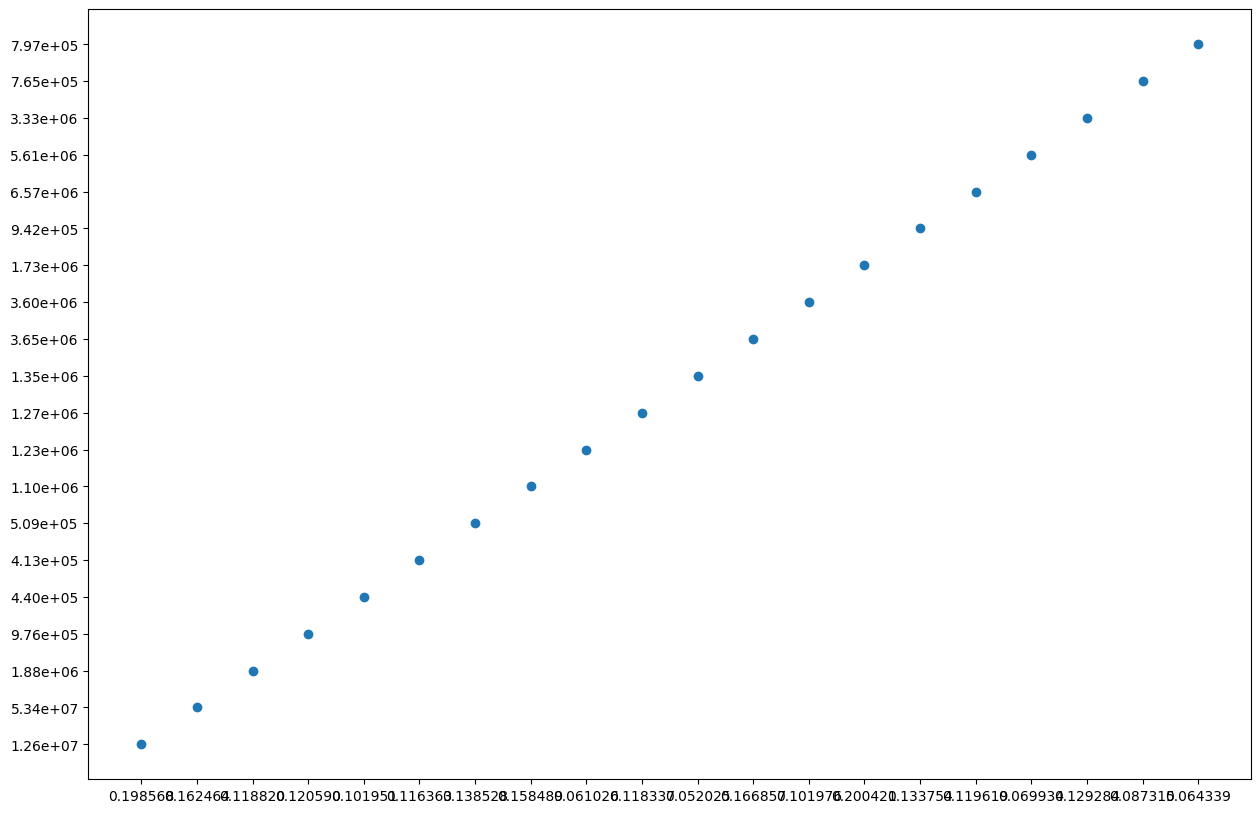

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(ellip_data[0:20], shapes_data["eig(1)"][0:20])

In [ ]:
print(ellip_data.max())
print(shapes_data["void ID"].max())

0.470716
998


In [ ]:
sorted_ellip = np.sort(np.array(ellip_data))#[0:20]))
sorted = np.argsort(sorted_ellip)
print(sorted)
sorted_id = np.sort(np.array(shapes_data["void ID"]))#[0:20]))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
print(shapes_data.isna().any().any())

NameError: name 'centers_data' is not defined

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

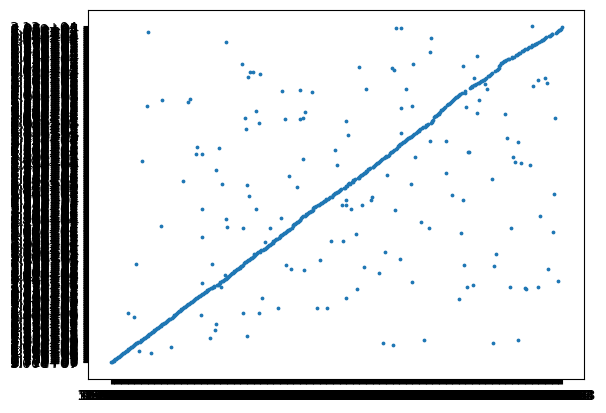

In [ ]:
plt.scatter(shapes_data["eig(1)"], shapes_data["eig(2)"], s=3)
plt.tick_params(np.linspace(float(shapes_data["eig(1)"].min()), float(shapes_data["eig(1)"].max()), 10))

(array([1., 2., 0., 1., 0., 1., 0., 4., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 2., 0., 2., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 2., 0., 1., 2., 0., 2., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 2., 0., 1., 0., 2., 0., 3., 0., 3., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 3., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 4., 0., 1.,
        0., 2., 0., 1., 0., 1., 0., 3., 0., 1., 0., 3., 0., 1., 1., 0., 1.,
        0., 1., 0., 2., 0., 2., 0., 1., 0., 1., 0., 2., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 2., 0., 1., 0., 2., 0., 1., 0., 1., 0., 2.,
        1., 0., 1., 0., 2., 0., 3., 0., 2., 0., 2., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 2., 0., 2., 0., 2., 0., 2., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        2., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 2., 0., 1., 0., 1.,
        0., 

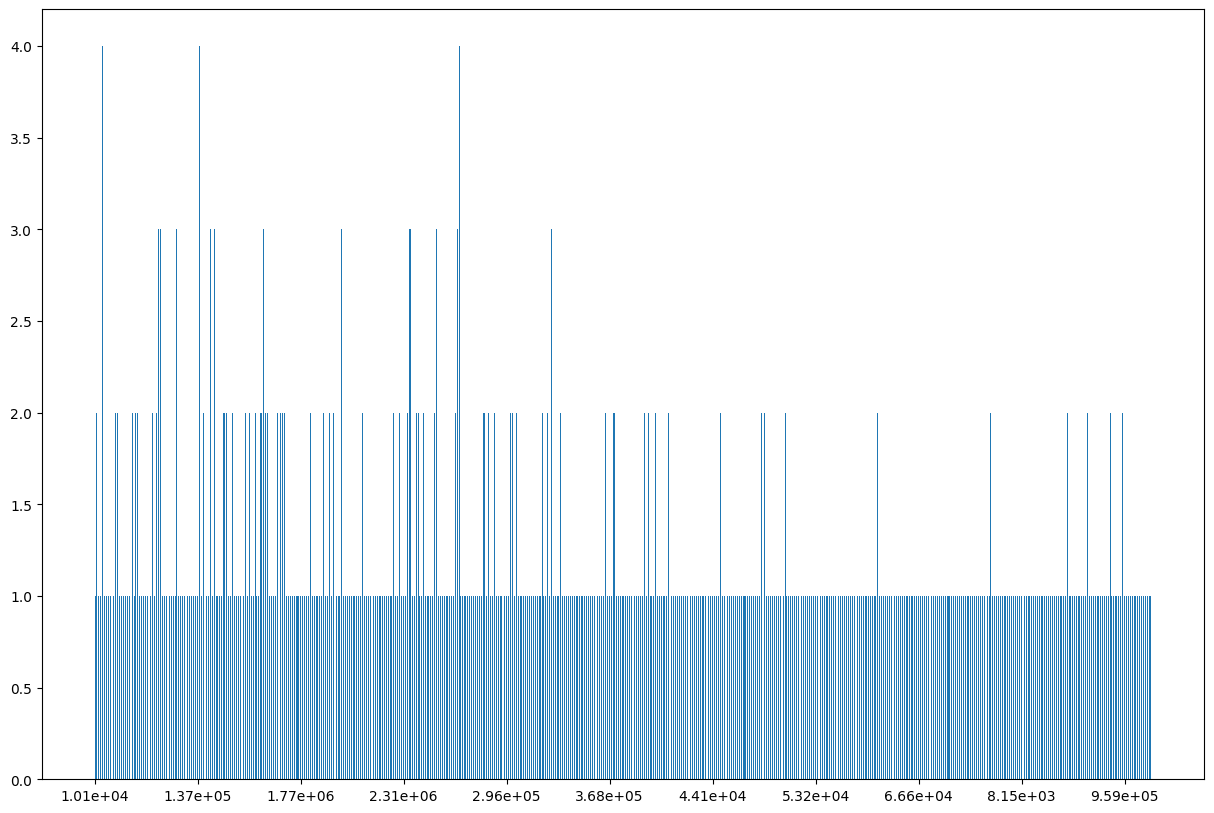

In [ ]:
plt.figure(figsize=(15, 10))
sorted = np.sort(np.array(shapes_data["eig(2)"]))
plt.xticks(np.arange(0, 514, 50))
plt.hist(sorted, bins=1000)

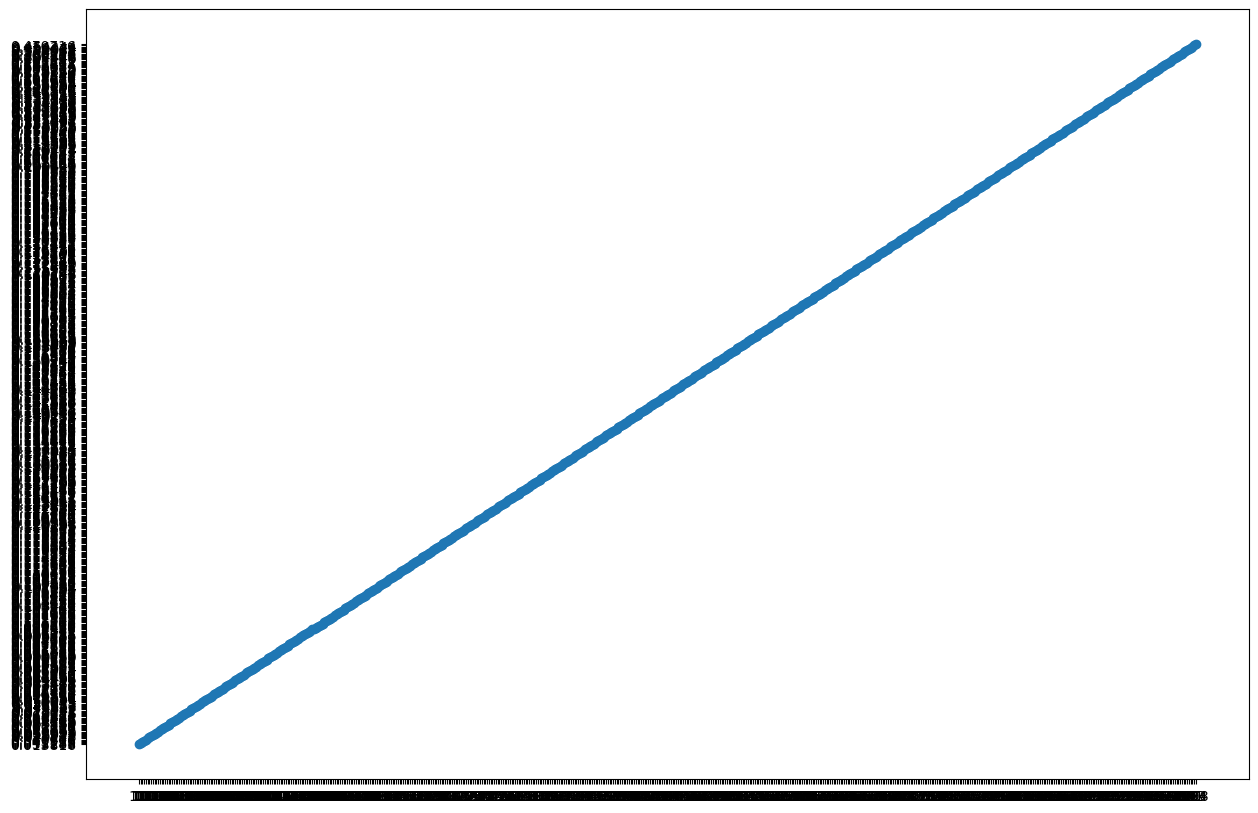

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(sorted_id, sorted_ellip)

In [ ]:
pairplot_data = shapes_data.iloc[:,:]
print(pairplot_data)
sns.pairplot(pairplot_data)

    void ID     ellip    eig(1)    eig(2)    eig(3)  eigv(1)-x   eiv(1)-y  \
1      1027  0.198568  1.26e+07  3.06e+07  2.75e+07   1.38e-01   9.90e-01   
2       115  0.162464  5.34e+07  9.77e+07  1.09e+08   5.59e-01  -6.14e-01   
3       259  0.118820  1.88e+06  2.71e+06  3.12e+06   7.54e-01   6.13e-01   
4      1085  0.120590  9.76e+05  1.54e+06  1.63e+06   6.40e-01   6.76e-01   
5       148  0.101951  4.40e+05  6.77e+05  5.83e+05   6.18e-01   6.84e-01   
..      ...       ...       ...       ...       ...        ...        ...   
601     137  0.112165  7.14e+04  1.02e+05  1.15e+05  -4.88e-01  -6.23e-01   
602     636  0.061940  1.84e+05  2.37e+05  2.25e+05  -2.61e-01   9.51e-01   
603     313  0.123236  1.34e+04  2.05e+04  2.26e+04   8.68e-01  -3.96e-01   
604    1091  0.273710  1.14e+03  4.08e+03  3.19e+03  -4.41e-01   8.91e-01   
605     851  0.202361  1.55e+04  3.13e+04  3.82e+04   2.33e-01   9.58e-01   

     eigv(1)-z  eigv(2)-x  eigv(2)-y  eigv(2)-z  eigv(3)-x  eigv(3)-y  \
1 

ValueError: No variables found for grid columns.

## Explore Centers Data for 1 Catalog

In [ ]:
# Actual headers
centers_headers = ["center x (Mpc/h)", "center y (Mpc/h)", "center z (Mpc/h)",
                   "volume (normalized)", "radius (Mpc/h)", "redshift", "volume (Mpc/h^3)",
                   "void ID", "density contrast", "num part", "parent ID", "tree level",
                   "number of children", "central density"]

# Temporary header to split data on using " " delimiter
temp_header2 = ["centers_headers"]

centers_data = pd.read_table("/content/drive/MyDrive/c170m_final_project/void_data/centers_all_Quijote_0_ss1.0_z0.00_d00.out",
                            names=temp_header2)

# Drop first column, since it's just the line with headers commented out
# df is [605 x 1]
centers_data = centers_data.drop(0)

# Split data using the " " delimiter
centers_data = centers_data["centers_headers"].str.split(" ", expand=True)

# Attech headers to corresponding columns in df
centers_data = pd.DataFrame(
    np.row_stack([centers_data.columns, centers_data.values]),
    columns=centers_headers
)

# Drop row 0 to remove column indices introduced from splitting data
# df is [605 x 14] -> Desired shape!
centers_data = centers_data.drop(0)

# View output
print(centers_data)

    center x (Mpc/h) center y (Mpc/h) center z (Mpc/h) volume (normalized)  \
1             220.67           572.45           536.65             1948.74   
2             511.79           632.20           311.30             4629.47   
3             714.25           918.07           168.01              527.17   
4             824.22           158.89           273.59              393.57   
5             299.46           837.93           617.26              237.16   
..               ...              ...              ...                 ...   
601            56.93           738.29            40.72               65.76   
602            31.38           315.93           239.06              122.98   
603           201.78           948.51           885.65               22.18   
604           755.08           589.82           480.16                5.83   
605           977.74           839.74           705.97               27.17   

    radius (Mpc/h) redshift volume (Mpc/h^3) void ID density co

In [ ]:
# Select radius data and density contrast data
radius_data = centers_data["radius (Mpc/h)"]
den_cont_data = centers_data["density contrast"]

## Stack desired parameters into 2D array

In [ ]:
# Column 0 = Ellipticity, Column 1 = Radius (Mpc/h), Column 2 = Desnity Contrast
input_params = np.c_[ellip_data, radius_data, den_cont_data]